In [8]:
import pandas as pd

import re
import nltk
from nltk.corpus import stopwords

import numpy as np
from numpy import array
from numpy import asarray
from numpy import zeros
import tensorflow
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense,BatchNormalization
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import GlobalMaxPooling1D,Conv1D,LSTM,MaxPooling1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

from imblearn.over_sampling import SMOTE
import matplotlib
import matplotlib.pyplot as plt



## LOAD PREPROCESS DATASET

In [2]:
import pandas as pd
df = pd.read_csv("clean_data_dec05.csv")
X = df['Tweet']
y = df['sentiment']
df.head()

,Tweet,sentiment
0,luvjuan maygodblessallsoul hopepeac grace peo...,Strongly Positive
1,murtazaview pdm not permit hold dec thirteen ...,Neutral
2,cbsla restaur owner forc shut coronaviru rest...,Negative
3,sumoh7 worth read IN full gtgtgt remdesivir c...,Positive
4,lauriegarrett stellar detail report florida g...,Positive


# LabelEncoder START

In [9]:
import sklearn

from sklearn import preprocessing
lab_enc =sklearn.preprocessing.LabelEncoder()

y_encoded = lab_enc.fit_transform(y)

In [9]:
np.unique(y_encoded)

array([0, 1, 2, 3, 4])

In [39]:
np.unique(y)

array(['Nagative', 'Neutral', 'Positive', 'Storngly Nagative',
       'Storngly Positive'], dtype=object)

# LabelEncoder END

# TRAIN TEST SPLIT START

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.20, random_state=42,shuffle=True)

In [11]:
type(X_train)

list

In [12]:
X_train[0]

'Discrepancies in Alaska DHSS Data Leave Alaskans Concerned'

# TRAIN TEST SPLIT END

In [74]:
print('Train_X : ',len(X_train))
print('Test_X : ',len(X_test))
print('Train_Y : ',len(y_train))
print('Test_Y : ',len(y_test))

Train_X :  14480
Test_X :  3620
Train_Y :  14480
Test_Y :  3620


In [75]:
Y_train = pd.DataFrame(y_train,columns=['sentiment'])

In [76]:
dict_label = Y_train['sentiment'].value_counts()

In [77]:
max(dict_label)

4829

In [12]:
#data_train = pd.DataFrame(X_train)
data_train = pd.DataFrame()
data_train['Tweet'] =X_train
data_train['sentiment'] = y_train
data_train.head()

,Tweet,sentiment
4250,greatpoet mahyartousi did ask want coronaviru...,2
7146,cafoodbank fractweet crystal fitzsimon “schoo...,2
2627,bsadams25 coronaviru australia live news sydn...,1
4605,she 102 she live one thousand nine hundr eight...,0
3827,who rememb dailybrief everi singl day conserv ...,1


# Tokenizer Start

In [13]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)



In [14]:
maxLengthTrain = max(len(x) for x in X_train ) 
maxLengthTest = max(len(x) for x in X_test ) 
print(maxLengthTrain)
print(maxLengthTest)

39
35


In [15]:
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

# Tokenizer END

In [16]:
X_train.shape

(9828, 100)

## DATA NORMALIZATION

In [10]:
from sklearn import preprocessing
X_train_normalized = preprocessing.normalize(X_train)
X_test_normalized = preprocessing.normalize(X_test)
#y_train_normalized=preprocessing.normalize([y_train])

In [79]:
print(X_train_normalized)

[[5.39961845e-01 3.20566282e-04 3.26721154e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.38933766e-01 6.15617895e-02 2.41070371e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.50408906e-01 1.62428624e-04 3.38501253e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.27225222e-02 1.96740034e-03 4.85292083e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.83791984e-01 4.58433205e-01 8.50623188e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.98031515e-01 3.24362084e-03 1.24784002e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [21]:
a = np.array(X_train)

In [374]:
a.reshape(-1,1)

array([[list([6, 2250, 189, 688, 9, 2, 87, 3, 1156, 1157, 1527])],
       [list([814, 2939, 4246, 1158, 2940, 754, 4, 689, 4247, 96, 1, 4248, 41, 519, 112, 85, 3, 66, 754, 4, 1808])],
       [list([31, 1, 49, 16, 15, 17, 84, 61, 52, 2, 30, 3, 6, 76, 1, 92, 56, 88, 68, 9, 89])],
       ...,
       [list([272, 2767, 4, 413, 38, 95, 577, 334, 38, 46, 2, 1629, 695, 161, 1, 511])],
       [list([4210, 2921, 176, 54, 3, 262, 221, 2, 478, 9, 4211, 1148, 4212, 382, 491, 10, 1540, 139, 8, 163])],
       [list([6, 1130, 108, 191, 1990, 3108, 3, 7, 605, 19, 147, 72, 1132, 1133, 137, 380])]],
      dtype=object)

### BALANCING DATA SATRT

In [17]:
number_sample_each_class = 5000
class0 = number_sample_each_class
class1 = number_sample_each_class
class2 = number_sample_each_class
class3 = number_sample_each_class
class4 = number_sample_each_class
strategy = {0:class0,1:class1,2:class2,3:class3,4:class4}

In [91]:
strategy

{0: 5000, 1: 5000, 2: 5000, 3: 5000, 4: 5000}

In [18]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy=strategy)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

C:\Users\puspa\Anaconda3\envs\tf\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (5000) in class 0 will be larger than the number of samples in the majority class (class #1 -> 4269)
  n_samples_majority,
C:\Users\puspa\Anaconda3\envs\tf\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (5000) in class 1 will be larger than the number of samples in the majority class (class #1 -> 4269)
  n_samples_majority,
C:\Users\puspa\Anaconda3\envs\tf\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (5000) in class 2 will be larger than the number of samples in the majority class (class #1 -> 4269)
  n_samples_majority,
C:\Users\puspa\Anaconda3\envs\tf\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (5000) in class 3 will be larger than the number of samples in 

In [19]:
data_train_sm = pd.DataFrame(X_train_sm)
data_train_sm['sentiment'] = y_train_sm
data_train_sm.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,sentiment
0,6688,4782,1372,195,180,1,20,638,4783,4784,...,0,0,0,0,0,0,0,0,0,2
1,6689,6690,3840,6691,6692,2506,137,4786,3841,6693,...,0,0,0,0,0,0,0,0,0,2
2,6695,1,459,85,259,2817,3842,511,15,8,...,0,0,0,0,0,0,0,0,0,1
3,207,1447,207,85,14,50,246,25,942,495,...,0,0,0,0,0,0,0,0,0,0
4,348,746,4787,215,470,17,1015,6696,1262,1947,...,0,0,0,0,0,0,0,0,0,1


In [20]:
data_train_sm['sentiment'].value_counts()

4    5000
3    5000
2    5000
1    5000
0    5000
Name: sentiment, dtype: int64

# # BALANCING DATA END

# PLOTTING AFTER DATA BALANCE

In [21]:
import seaborn as sns

<AxesSubplot:xlabel='sentiment', ylabel='count'>

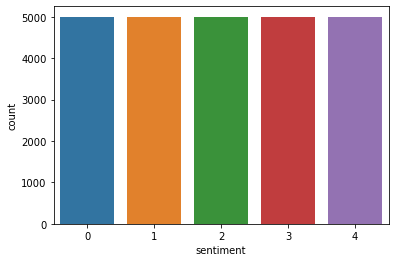

In [22]:
sns.countplot(x='sentiment', data=data_train_sm)

# CONVERTING  NUMER TO VECTOR ON LEVELING CLASS

In [27]:
#Converts a class vector (integers) to binary class matrix.
from tensorflow.keras.utils import to_categorical 
train_labels = to_categorical(y_train_sm, dtype ="uint8") 
test_labels = to_categorical(y_test, dtype ="uint8")

In [28]:
print('X - train : ',X_train_sm.shape)
print('Y - train : ',train_labels.shape)
print('X - test : ',X_test.shape)
print('Y - test : ',test_labels.shape)

X - train :  (25000, 100)
Y - train :  (25000, 5)
X - test :  (2458, 100)
Y - test :  (2458, 5)


In [28]:
length = train_labels.shape[0]

In [29]:
length

25000

##PREPARING EMBEDDING MARTRIX(GLOVE)

In [23]:
from numpy import array
from numpy import asarray
from numpy import zeros

# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1
embeddings_dictionary = dict()
glove_file = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, maxlen))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
        
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.043959  ,  0.18935999,  0.66109997, ..., -0.14168   ,
         0.92789   ,  0.59057999],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

# Trace

In [250]:
#oversample = SMOTE()
#from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
k_values = [1, 2, 3, 4, 5, 6, 7]


      
resampling=resamplingDataPrep(X_train,y_train,'Sentiment')
over = SMOTE()

#sampling_strategy = {'Nagative': 1000, 'Positive': 1000,'Storngly Nagative': 1000, 'Storngly Positive': 1000}
under = RandomUnderSampler()
steps = [('o', over), ('u', under)] 
pipeline = Pipeline(steps=steps)

#X = X.astype(np.float64)
#X=X.reshape(-1, 1)
#X, y = oversample.fit_resample(X, y)


X_train,y_train = pipeline.fit_resample(X_train, y_train_encoded)





(3785,)


In [275]:
print(np.unique(pd.DataFrame(y_train_encoded).values))

[0 1 2 3 4]


In [264]:
type(y_train)

my_df = {
         'Sentiment': y  
        } 

df1 = pd.DataFrame(my_df)
df1.head()


,Sentiment
0,Neutral
1,Positive
2,Storngly Positive
3,Nagative
4,Nagative


# Models

## Model 1

In [25]:
vocab_size


14131

In [44]:
maxLengthTrain

52

In [45]:
len(embedding_matrix)

15244

In [31]:
model = Sequential()

embedding_layer = Embedding(vocab_size, maxlen, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Flatten())


model.add(Dense(5, activation='softmax'))

opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)


In [32]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])

print(model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1413100   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 50005     
Total params: 1,463,105
Trainable params: 50,005
Non-trainable params: 1,413,100
_________________________________________________________________
None


In [35]:
history = model.fit(X_train_sm, train_labels, batch_size=128, epochs=50, verbose=1, validation_data=(X_test,test_labels))

Train on 25000 samples, validate on 2458 samples
Epoch 1/50
25000/25000 [==============================] - 5s 188us/sample - loss: 1.2360 - acc: 0.5405 - val_loss: 1.0393 - val_acc: 0.6221
Epoch 2/50
25000/25000 [==============================] - 4s 151us/sample - loss: 1.1062 - acc: 0.5999 - val_loss: 1.0133 - val_acc: 0.6286
Epoch 3/50
25000/25000 [==============================] - ETA: 0s - loss: 1.0833 - acc: 0.617 - 4s 155us/sample - loss: 1.0836 - acc: 0.6174 - val_loss: 1.0615 - val_acc: 0.6338
Epoch 4/50
25000/25000 [==============================] - 4s 159us/sample - loss: 1.0814 - acc: 0.6209 - val_loss: 1.0395 - val_acc: 0.6452
Epoch 5/50
25000/25000 [==============================] - 4s 159us/sample - loss: 1.0731 - acc: 0.6281 - val_loss: 1.0865 - val_acc: 0.6343
Epoch 6/50
25000/25000 [==============================] - 4s 168us/sample - loss: 1.0680 - acc: 0.6285 - val_loss: 1.0625 - val_acc: 0.6229
Epoch 7/50
25000/25000 [==============================] - 4s 158us/sample

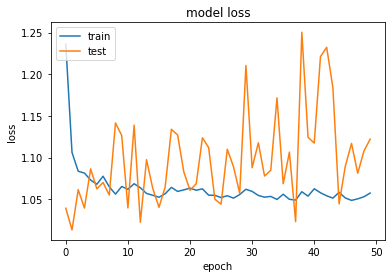

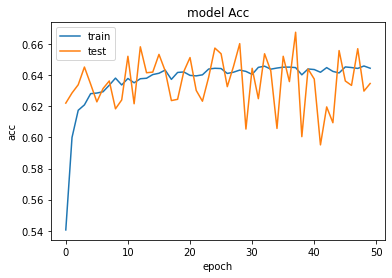

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model Acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [39]:
score = model.evaluate(X_test,test_labels, verbose=1)
score
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

2458/2458 [==============================] - 0s 96us/sample - loss: 1.1221 - acc: 0.6347
Test Score: 1.1220971975411895
Test Accuracy: 0.63466233


# PLOT MODEL1

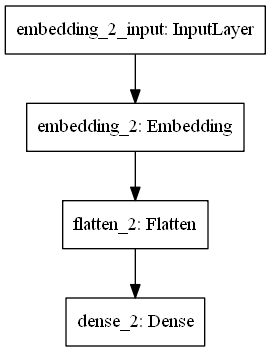

In [41]:
tensorflow.keras.utils.plot_model(model, "model1.png")


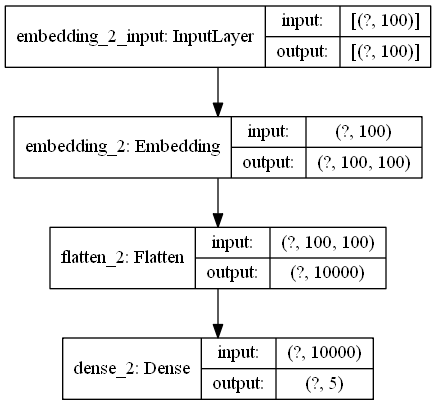

In [42]:
tensorflow.keras.utils.plot_model(model, "model1_with_shape_info.png", show_shapes=True)

# SAVE MODEL1

In [50]:
  
model.save('model1')

INFO:tensorflow:Assets written to: model1\assets


In [51]:
reconstructed_model = tensorflow.keras.models.load_model("model1")

In [55]:
# Let's check:
np.testing.assert_allclose(
    model.predict(X_test), reconstructed_model.predict(X_test)
)

In [54]:
score1=reconstructed_model.evaluate(X_test,test_labels)
print("Test Score:", score1[0])
print("Test Accuracy:", score1[1])


2458/2458 [==============================] - 0s 171us/sample - loss: 1.1219 - acc: 0.6347
Test Score: 1.1218570167209385
Test Accuracy: 0.63466233


# MODEL2

In [60]:
model = Sequential()

embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
#model.add(BatchNormalization())

#con layer1
model.add(Conv1D(128, 5,kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001), activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(BatchNormalization())


model.add(Dense(64,activation='relu')) 
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(BatchNormalization())


model.add(Dense(5, activation='softmax'))

opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])

print(model.summary())

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_26 (Embedding)     (None, 100, 100)          1524400   
_________________________________________________________________
conv1d_33 (Conv1D)           (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d_7 (Glob (None, 128)               0         
_________________________________________________________________
batch_normalization_113 (Bat (None, 128)               512       
_________________________________________________________________
dropout_51 (Dropout)         (None, 128)               0         
_________________________________________________________________
batch_normalization_114 (Bat (None, 128)               512       
_________________________________________________________________
dense_47 (Dense)             (None, 64)              

In [61]:
history = model.fit(X_train_sm, train_labels, batch_size=128, epochs=10, verbose=1, validation_data=(X_test,test_labels))


Train on 25000 samples, validate on 3620 samples
Epoch 1/10
25000/25000 [==============================] - 70s 3ms/sample - loss: 1.4188 - acc: 0.5594 - val_loss: 1.2994 - val_acc: 0.6414
Epoch 2/10
25000/25000 [==============================] - 69s 3ms/sample - loss: 1.2792 - acc: 0.6333 - val_loss: 1.2172 - val_acc: 0.6967
Epoch 3/10
25000/25000 [==============================] - 59s 2ms/sample - loss: 1.2719 - acc: 0.6441 - val_loss: 1.1702 - val_acc: 0.6970
Epoch 4/10
25000/25000 [==============================] - 58s 2ms/sample - loss: 1.2789 - acc: 0.6483 - val_loss: 1.1684 - val_acc: 0.7127
Epoch 5/10
25000/25000 [==============================] - 61s 2ms/sample - loss: 1.2718 - acc: 0.6510 - val_loss: 1.2872 - val_acc: 0.6724
Epoch 6/10
25000/25000 [==============================] - 58s 2ms/sample - loss: 1.2690 - acc: 0.6530 - val_loss: 1.1845 - val_acc: 0.6972
Epoch 7/10
25000/25000 [==============================] - 59s 2ms/sample - loss: 1.2734 - acc: 0.6474 - val_loss: 1.2

In [71]:
score = model.evaluate(X_test,test_labels, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

3620/3620 [==============================] - 45s 12ms/sample - loss: 1.6018 - acc: 0.2472
Test Score: 1.6017727575249434
Test Accuracy: 0.24723756


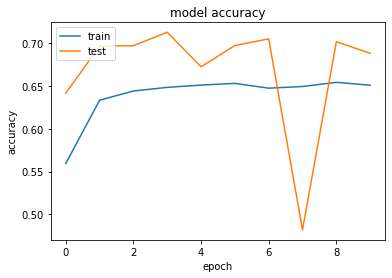

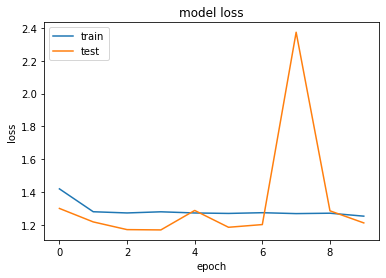

In [63]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

# PLOT MODEL2

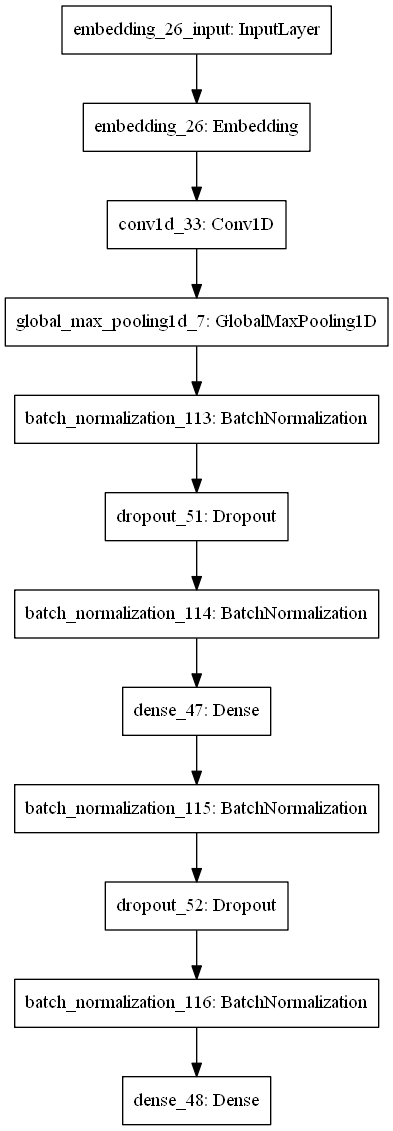

In [65]:
tensorflow.keras.utils.plot_model(model, "model2.png")


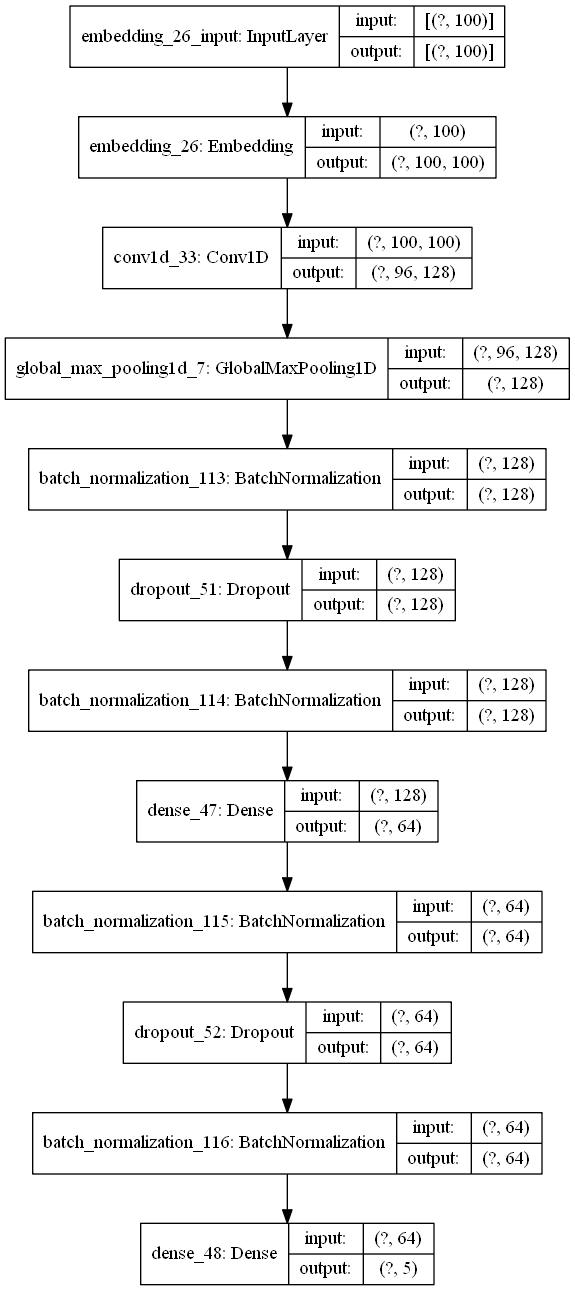

In [66]:
tensorflow.keras.utils.plot_model(model, "model2_with_shape_info.png", show_shapes=True)

# #MODEL3

In [68]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)


#LSTM LAYER
#kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01)
model.add(LSTM(256))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(BatchNormalization())


model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(64,activation='relu')) 
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(5, activation='softmax'))
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])

print(model.summary())

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_28 (Embedding)     (None, 100, 100)          1524400   
_________________________________________________________________
lstm_5 (LSTM)                (None, 256)               365568    
_________________________________________________________________
batch_normalization_126 (Bat (None, 256)               1024      
_________________________________________________________________
dropout_58 (Dropout)         (None, 256)               0         
_________________________________________________________________
batch_normalization_127 (Bat (None, 256)               1024      
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0         
_________________________________________________________________
dropout_59 (Dropout)         (None, 256)             

In [ ]:
history = model.fit(X_train_sm, train_labels, batch_size=128, epochs=50, verbose=1, validation_data=(X_test,test_labels))


Train on 25000 samples, validate on 3620 samples
Epoch 1/50
25000/25000 [==============================] - 764s 31ms/sample - loss: 1.5849 - acc: 0.2556 - val_loss: 1.5808 - val_acc: 0.2511
Epoch 2/50
25000/25000 [==============================] - 733s 29ms/sample - loss: 1.5858 - acc: 0.2537 - val_loss: 1.5899 - val_acc: 0.2528
Epoch 3/50
25000/25000 [==============================] - 661s 26ms/sample - loss: 1.5879 - acc: 0.2524 - val_loss: 1.5843 - val_acc: 0.2525
Epoch 4/50
25000/25000 [==============================] - 612s 24ms/sample - loss: 1.5852 - acc: 0.2579 - val_loss: 1.5760 - val_acc: 0.2773
Epoch 5/50
 8192/25000 [========>.....................] - ETA: 9:16 - loss: 1.5834 - acc: 0.2605

In [72]:
score = model.evaluate(X_test,test_labels, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

3620/3620 [==============================] - 50s 14ms/sample - loss: 1.6018 - acc: 0.2472
Test Score: 1.6017727575249434
Test Accuracy: 0.24723756


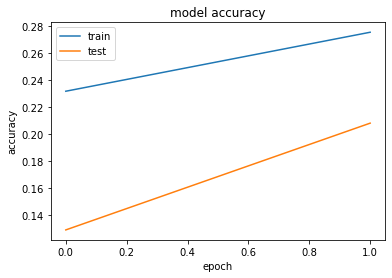

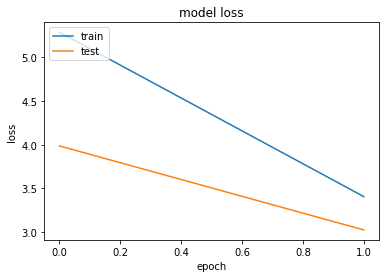

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

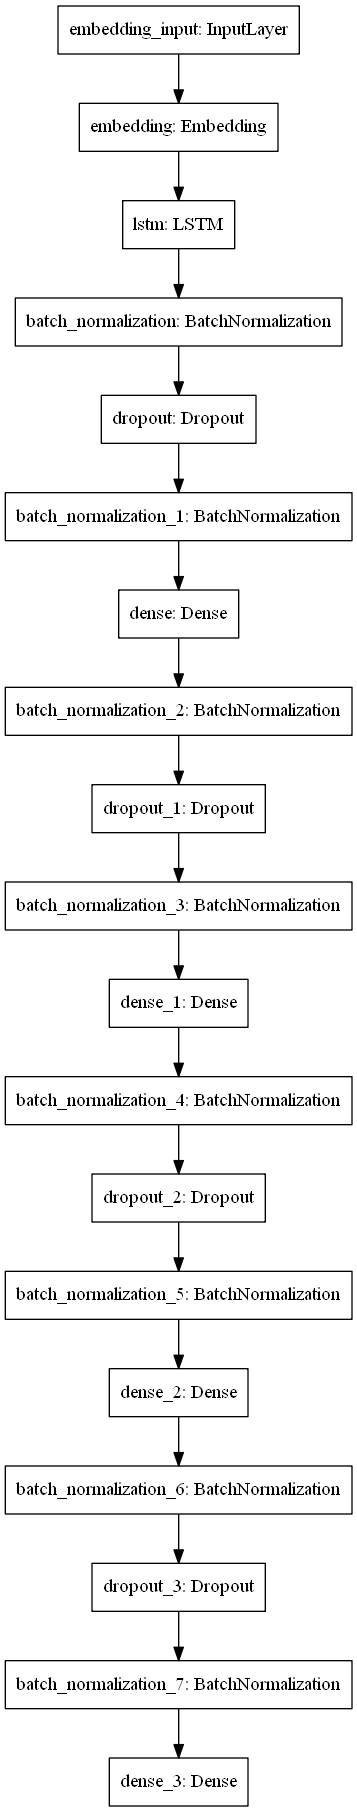

In [16]:
tensorflow.keras.utils.plot_model(model, "my_first_model.png")


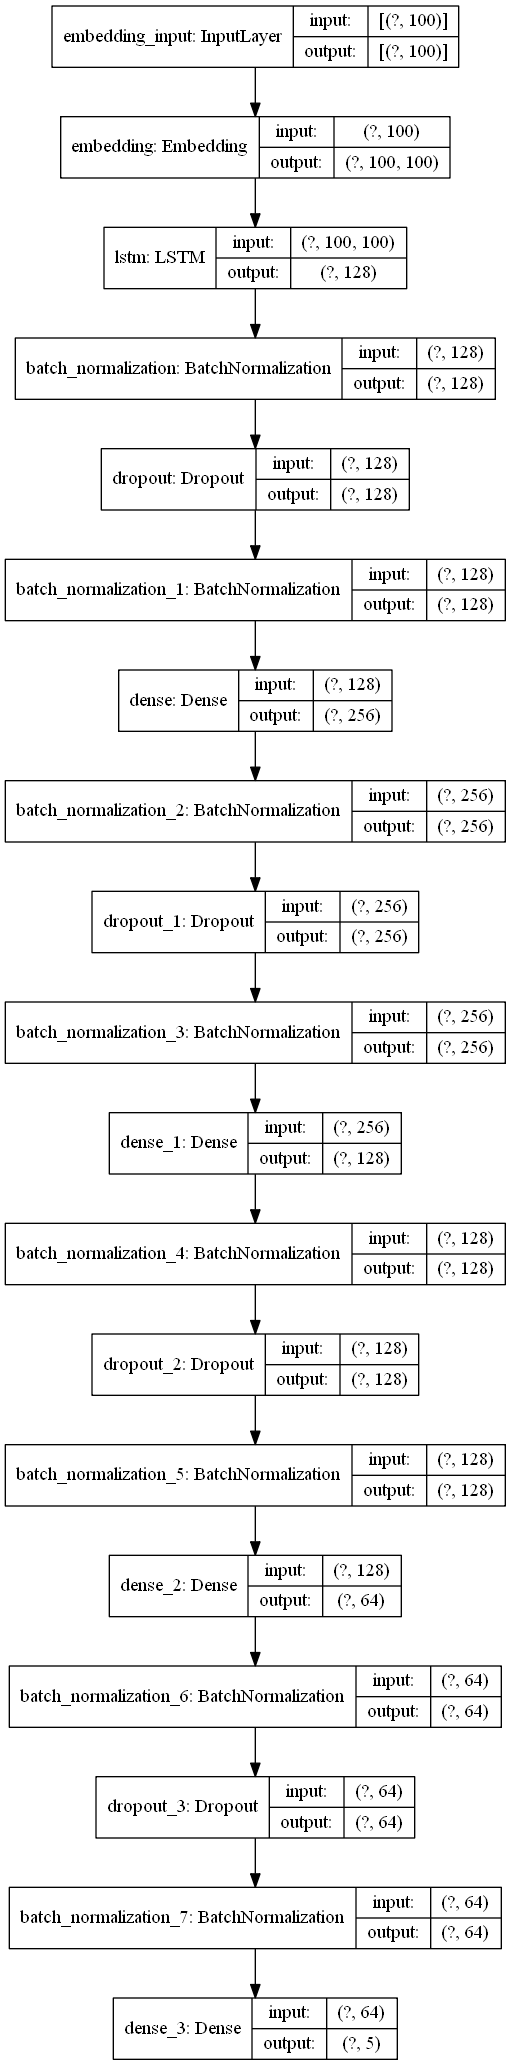

In [17]:
tensorflow.keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

In [56]:
instance = X[27]
print(instance)

 wef the head imf messag intern commun covid19 econom


In [57]:
instance = tokenizer.texts_to_sequences(instance)

flat_list = []
for sublist in instance:
    for item in sublist:
        flat_list.append(item)

flat_list = [flat_list]
#print(flat_list)
instance = pad_sequences(flat_list, padding='post', maxlen=maxlen)

model.predict(instance)

array([[3.2077315e-03, 8.5659188e-14, 7.2315778e-04, 9.9606907e-01,
        3.4607468e-21]], dtype=float32)